In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-24.911153104851806 7.6541118634950465
-39.54966513045849 93.8715222522174
27.828066526760452 -118.94842310926154
13.528411593173146 -91.89455515025962
23.813958547049168 -43.81015545284319
-84.20944364700343 2.795544397086985
60.94455472098974 77.93470860937924
-33.45912351958663 -176.91251063477387
36.93123615674577 28.715088853866007
6.486038244290015 -3.832354140981238
-26.479315237470693 -44.116908787877435
-62.233774269586554 -62.80745670448218
-70.43186590315256 109.62372000409692
3.3032419213233766 -98.17548099953368
-39.875720397080904 5.6726050190494846
20.04101773265444 -143.32434242686713
-13.326746027606461 -4.996042621490261
-76.69157739925393 114.28695132947308
-76.03374510037699 -20.76265342189015
16.14103903036157 36.78148077447051
-87.08548855692756 -41.302012616537894
-3.1063572171679255 106.69493342515273
50.11657823387898 -72.05485479632762
1.8587563522117847 -179.35204062385856
29.812999380134784 126.9093149496415
66.60180963071826 7.674200509322134
86.05870592154

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Import requests library, API key, time library, datetime module from datetime library

import requests
from config import weather_api_key
import time
from datetime import datetime

In [8]:
# Build the basic URL with API key added
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | champerico
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | strezhevoy
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | marmaris
Processing Record 10 of Set 1 | akoupe
Processing Record 11 of Set 1 | ilhabela
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | wagar
Processing Record 19 of Set 1 | manggar
Processing Record 20 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 22 of Set 1 | na

Processing Record 38 of Set 4 | sur
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | yukuhashi
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | mende
Processing Record 45 of Set 4 | mitsamiouli
Processing Record 46 of Set 4 | vila
Processing Record 47 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 48 of Set 4 | emerald
Processing Record 49 of Set 4 | eydhafushi
Processing Record 50 of Set 4 | mulege
Processing Record 1 of Set 5 | batagay-alyta
Processing Record 2 of Set 5 | muli
Processing Record 3 of Set 5 | sedlcany
Processing Record 4 of Set 5 | rawlins
Processing Record 5 of Set 5 | sorvag
City not found. Skipping...
Processing Record 6 of Set 5 | lusambo
Processing Record 7 of Set 5 | barinas
Processing Record 8 of Set 5 | aguimes
Processing Record 9 of Set 5 | san vicente
Processing Record 10 of Set 5 | mount pleasant
Processi

Processing Record 29 of Set 8 | antalaha
Processing Record 30 of Set 8 | kisangani
Processing Record 31 of Set 8 | sorland
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | pacific grove
Processing Record 34 of Set 8 | gari
Processing Record 35 of Set 8 | monte alegre
Processing Record 36 of Set 8 | abakan
Processing Record 37 of Set 8 | santiago de chuco
Processing Record 38 of Set 8 | svetlogorsk
Processing Record 39 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 40 of Set 8 | nemuro
Processing Record 41 of Set 8 | kensington
Processing Record 42 of Set 8 | teguldet
Processing Record 43 of Set 8 | cypress gardens
Processing Record 44 of Set 8 | bollnas
Processing Record 45 of Set 8 | saltillo
Processing Record 46 of Set 8 | oktyabrskoye
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | mopipi
Processing Record 49 of Set 8 | aswan
Processing Record 50 of Set 8 | flagstaff
Processing Record 1 of Set 9 | belmonte
Processi

Processing Record 16 of Set 12 | tir pol
City not found. Skipping...
Processing Record 17 of Set 12 | fort smith
Processing Record 18 of Set 12 | jiddah
City not found. Skipping...
Processing Record 19 of Set 12 | roros
Processing Record 20 of Set 12 | varhaug
Processing Record 21 of Set 12 | korla
Processing Record 22 of Set 12 | lata
Processing Record 23 of Set 12 | dandong
Processing Record 24 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 25 of Set 12 | maumere
Processing Record 26 of Set 12 | tabasalu
Processing Record 27 of Set 12 | bayaguana
Processing Record 28 of Set 12 | varkkallai
Processing Record 29 of Set 12 | marseille
Processing Record 30 of Set 12 | kanigiri
Processing Record 31 of Set 12 | dawlatabad
Processing Record 32 of Set 12 | soubre
Processing Record 33 of Set 12 | bridlington
Processing Record 34 of Set 12 | samarai
Processing Record 35 of Set 12 | avera
Processing Record 36 of Set 12 | seguela
Processing Record 37 of Set 12 | baghdad
Pro

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Walvis Bay,-22.9575,14.5053,52.09,93,0,5.75,NA,2022-08-30 00:59:16
1,Busselton,-33.6500,115.3333,54.05,70,12,5.46,AU,2022-08-30 00:54:41
2,San Quintin,30.4833,-115.9500,71.44,79,20,14.52,MX,2022-08-30 00:59:17
3,Champerico,14.3000,-91.9167,79.34,77,100,5.39,GT,2022-08-30 00:59:17
4,Bathsheba,13.2167,-59.5167,83.01,83,40,12.66,BB,2022-08-30 00:59:17
5,Hermanus,-34.4187,19.2345,46.80,71,5,15.17,ZA,2022-08-30 00:59:17
6,Strezhevoy,60.7333,77.5889,49.78,76,100,7.34,RU,2022-08-30 00:59:18
7,Vaini,-21.2000,-175.2000,73.56,100,40,4.61,TO,2022-08-30 00:59:18
8,Marmaris,36.8550,28.2742,78.12,71,0,3.11,TR,2022-08-30 00:59:18
9,Akoupe,6.3900,-3.9003,70.54,94,71,3.58,CI,2022-08-30 00:59:19


In [11]:
# Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Walvis Bay,NA,2022-08-30 00:59:16,-22.9575,14.5053,52.09,93,0,5.75
1,Busselton,AU,2022-08-30 00:54:41,-33.6500,115.3333,54.05,70,12,5.46
2,San Quintin,MX,2022-08-30 00:59:17,30.4833,-115.9500,71.44,79,20,14.52
3,Champerico,GT,2022-08-30 00:59:17,14.3000,-91.9167,79.34,77,100,5.39
4,Bathsheba,BB,2022-08-30 00:59:17,13.2167,-59.5167,83.01,83,40,12.66
5,Hermanus,ZA,2022-08-30 00:59:17,-34.4187,19.2345,46.80,71,5,15.17
6,Strezhevoy,RU,2022-08-30 00:59:18,60.7333,77.5889,49.78,76,100,7.34
7,Vaini,TO,2022-08-30 00:59:18,-21.2000,-175.2000,73.56,100,40,4.61
8,Marmaris,TR,2022-08-30 00:59:18,36.8550,28.2742,78.12,71,0,3.11
9,Akoupe,CI,2022-08-30 00:59:19,6.3900,-3.9003,70.54,94,71,3.58


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [3]:
# Read csv we saved
weather_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(weather_data_to_load)

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

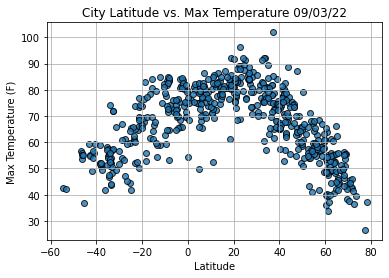

In [4]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

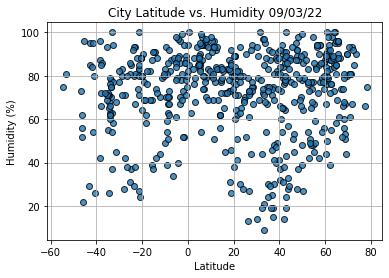

In [5]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

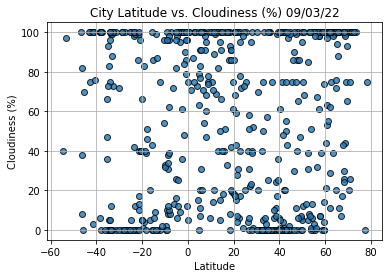

In [6]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

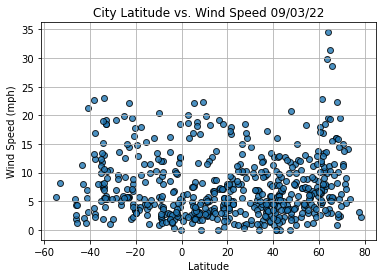

In [7]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()